## **PROJETO**

**Objetivos:**

*   detectar placa de carro
*   modificar imagem para ficar facilmentee legivel


**FEATURES**

Considere a imagem mostrada abaixo:

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img1 = cv.imread('placa_carro_blank.jpg',0)
img2 = cv.imread('placa_de_carroII.jpg',0)
img1 = cv.imread('vehicle_blank.jpg',0)


print(img1.shape)
print(img2.shape)


(1000, 3077)
(437, 702)


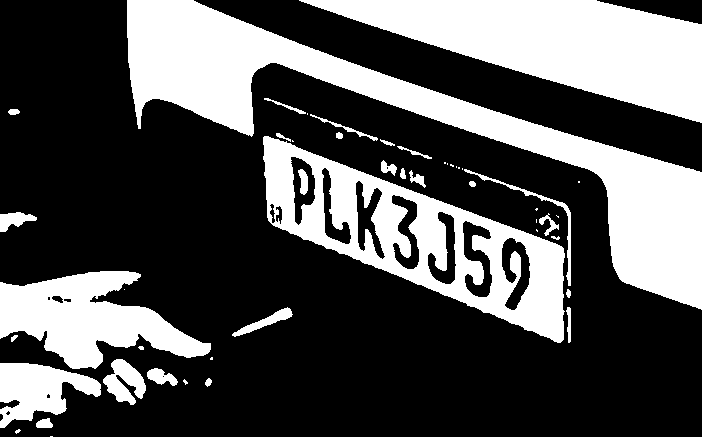

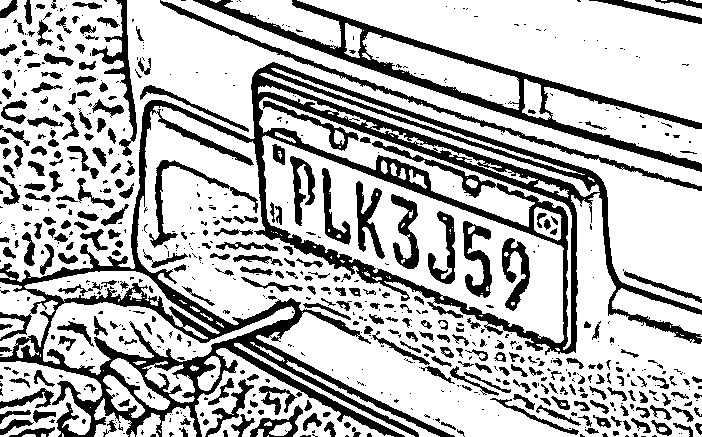

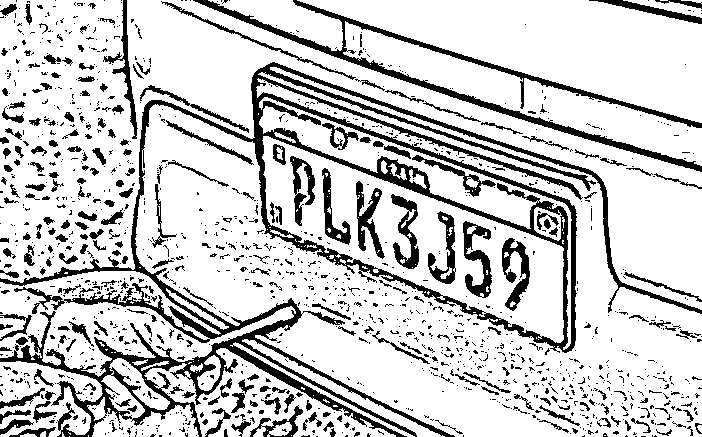

In [4]:
img = cv.imread('placa_de_carroII.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,135,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

cv2_imshow(th1)
cv2_imshow(th2)
cv2_imshow(th3)

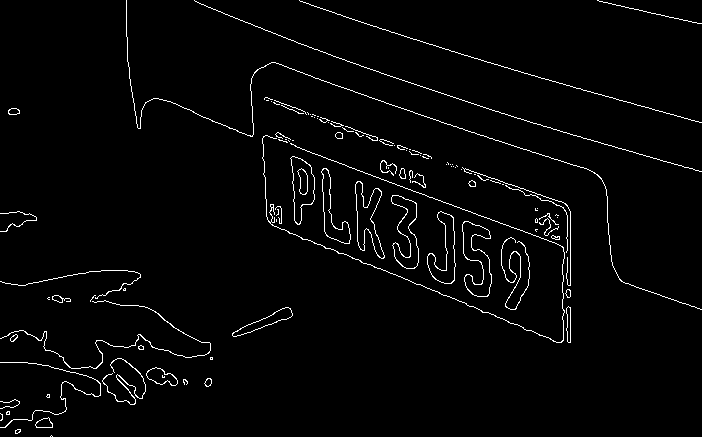

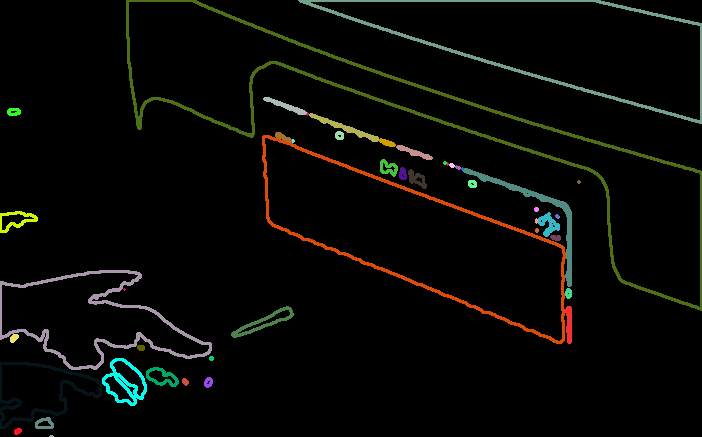

In [5]:

import random as rng

edged = cv.Canny(th1, 200, 200)
cv2_imshow(edged)

contours,hierarchy = cv.findContours(th1,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

drawing = np.zeros((edged.shape[0], edged.shape[1], 3), dtype=np.uint8)
for i in range(len(contours)):
    color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
    cv.drawContours(drawing, contours, i, color, 2, cv.LINE_8, hierarchy, 0)
cv2_imshow(drawing)



In [40]:
output = cv.imread('placa_de_carroII.jpg')
rects = []
#contour = 
for i in range(len(contours)):
  #contour = max(contours, key = len)
  #contours.remove(max(contours, key = len))
  #contour = max(contours, key = len)

  color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
  # over a number of epsilon sizes
  for eps in np.linspace(0.001, 0.05, 10):
    #print(eps)
    # approximate the contour
    peri = cv.arcLength(contours[i], True)
    approx = cv.approxPolyDP(contours[i], eps * peri, True)
    # draw the approximated contour on the image

  if len(approx) == 4:
    convex = False
    print(type(approx[0]))
    print(approx[0].shape)
    for p in range(len(square)):
      print(square)
      print(square[0])
      print(square[0][0])
      print(square[0][0][0])

      a = approx[p-1][0][0] - approx[p][0][0], approx[p-1][0][1] - approx[p-1][0][1]
      if p != len(approx)-1:
        #angle = np.angle(square[p-1]-square[p],square[p+1]-square[p])
        b = approx[p][0][0] - approx[p+1][0][0], approx[p][0][1] - approx[p+1][0][1]
        c = approx[p-1][0][0] - approx[p+1][0][0], approx[p-1][0][1] - approx[p+1][0][1]
      else:
        b = approx[p-1][0][0] - approx[-1][0][0], approx[p-1][0][1] - approx[-1][0][1]
        c = approx[p-1][0][0] - approx[-1][0][0], approx[p-1][0][1] - approx[-1][0][1]
        #angle = np.angle(square[p-1]-square[p],square[-1]-square[p])

      #angle = arccos ( (b^2-a^2-c^2) / 2*a*c )
      print(angle)


    rects.append(approx)
    cv.drawContours(output, [approx], -1, color, 3)
    text = "eps={:.4f}, num_pts={}".format(eps, len(approx))
    #cv.putText(output, text, (x, y - 15), cv.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    # show the approximated contour image
    #print("[INFO] {}".format(text))
cv2_imshow(output)
print(rects)

<class 'numpy.ndarray'>
(1, 2)
[[[209 378]]

 [[205 382]]

 [[207 386]]

 [[211 382]]]
[[209 378]]
[209 378]
209


IndexError: ignored

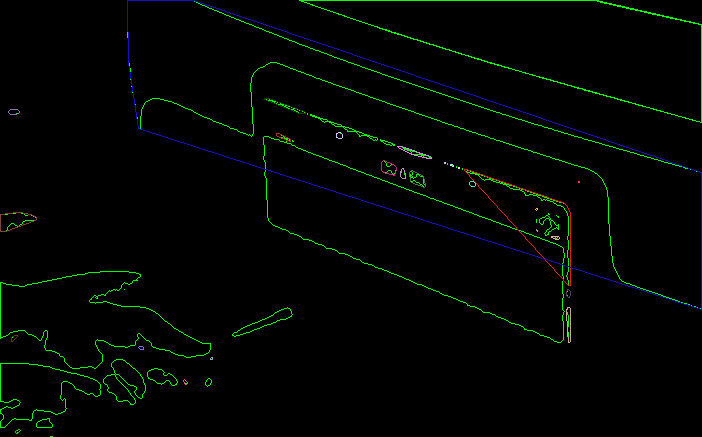

In [145]:
cnts = []
drawing2 = np.zeros((th1.shape[0], th1.shape[1], 3), np.uint8)
for i in range(len(contours)):
  hull = cv.convexHull(contours[i])
  simplified_cnt = cv.approxPolyDP(hull,0.001*cv.arcLength(hull,True),True)
  edg_num = len(simplified_cnt)
  if edg_num < 10 and edg_num > 3:
    cnts.append(simplified_cnt)
  cv.drawContours(drawing2, contours, i, color_contours, 1, 8, hierarchy)
  #print("cnt:")
  #print(simplified_cnt)

for i in range(len(cnts)):
  color_contours = (0, 255, 0) # green - color for contours
  color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
  # draw ith contour
  # draw ith convex hull object
  cv.drawContours(drawing2, cnts, i, color, 1, 8)
cv2_imshow(drawing2)

[[[ 53 432]]

 [[ 52 433]]

 [[ 51 433]]

 [[ 49 435]]

 [[ 49 436]]

 [[ 55 436]]

 [[ 55 435]]

 [[ 54 434]]

 [[ 54 433]]]
[[[ 24 427]]

 [[ 23 428]]

 [[ 20 428]]

 [[ 19 429]]

 [[ 16 429]]

 [[ 15 428]]

 [[ 13 430]]

 [[ 13 432]]

 [[ 14 432]]

 [[ 15 433]]

 [[ 17 433]]

 [[ 18 432]]

 [[ 19 432]]

 [[ 20 431]]

 [[ 21 431]]

 [[ 24 428]]

 [[ 25 428]]

 [[ 25 427]]]
[[[138 406]]

 [[138 408]]

 [[139 408]]

 [[140 407]]

 [[140 406]]]
[[[208 377]]

 [[207 378]]

 [[206 378]]

 [[204 380]]

 [[204 381]]

 [[205 382]]

 [[204 383]]

 [[204 385]]

 [[206 387]]

 [[207 387]]

 [[208 386]]

 [[209 386]]

 [[210 385]]

 [[210 384]]

 [[211 383]]

 [[211 382]]

 [[212 381]]

 [[212 380]]

 [[211 379]]

 [[211 378]]

 [[210 378]]

 [[209 377]]]
[[[152 368]]

 [[151 369]]

 [[150 369]]

 [[147 372]]

 [[147 373]]

 [[146 374]]

 [[146 376]]

 [[149 379]]

 [[151 379]]

 [[152 380]]

 [[153 380]]

 [[155 382]]

 [[156 382]]

 [[157 383]]

 [[158 383]]

 [[159 384]]

 [[164 384]]

 [[166

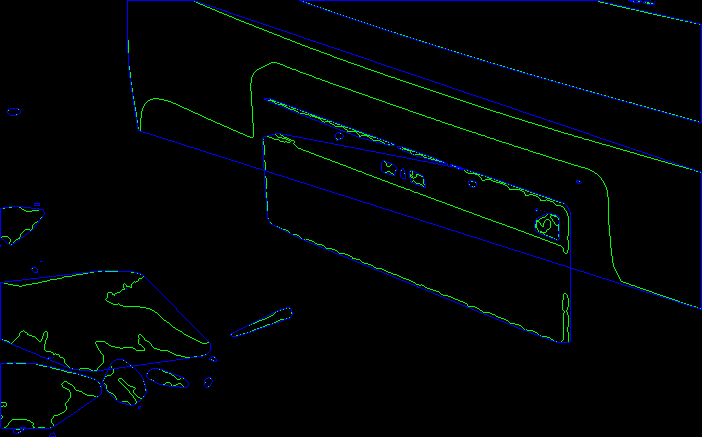

In [89]:



contours,hierarchy = cv.findContours(th1,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)


# create hull array for convex hull points
hull = []



# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv.convexHull(contours[i], False))

# create an empty black image
drawing = np.zeros((th1.shape[0], th1.shape[1], 3), np.uint8)

# draw contours and hull points
for i in range(len(contours)):
    print(contours[i])
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object
    cv.drawContours(drawing, hull, i, color, 1, 8)
cv2_imshow(drawing)

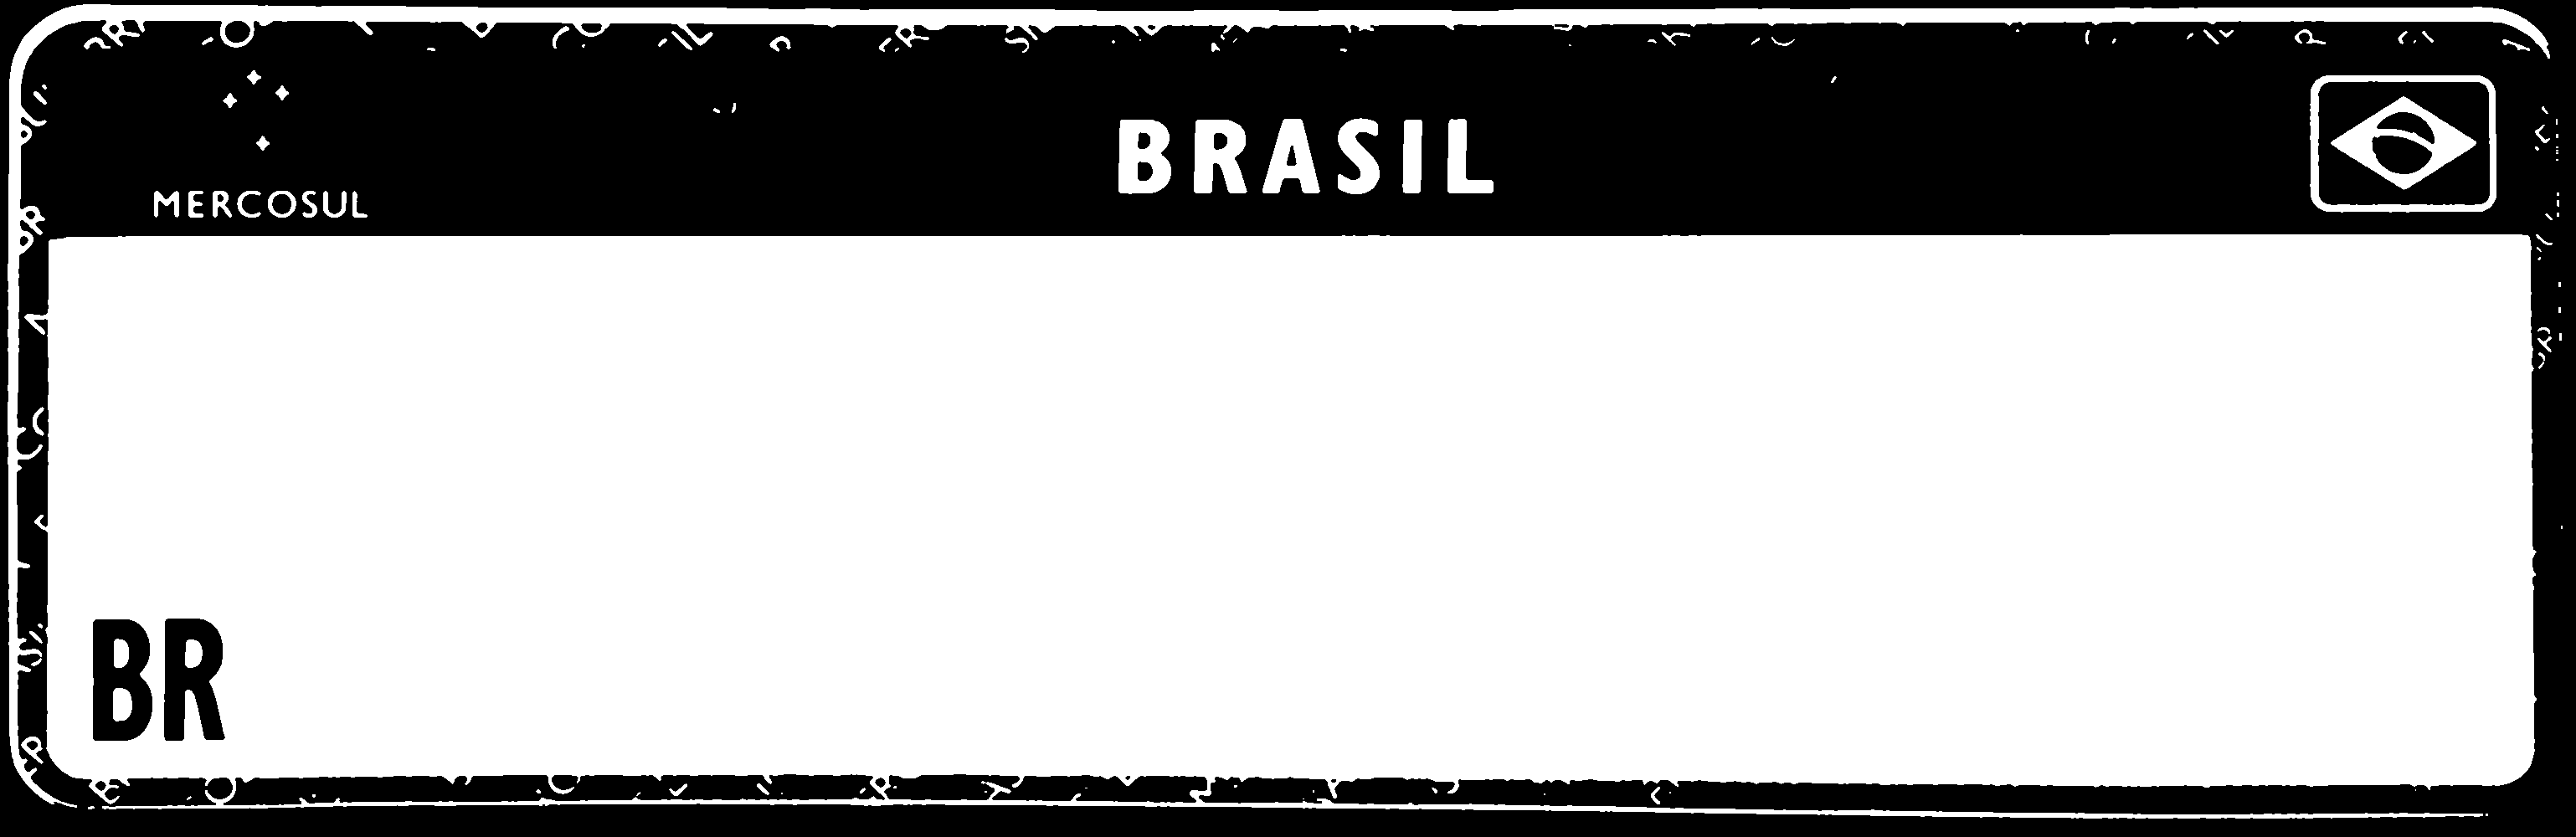

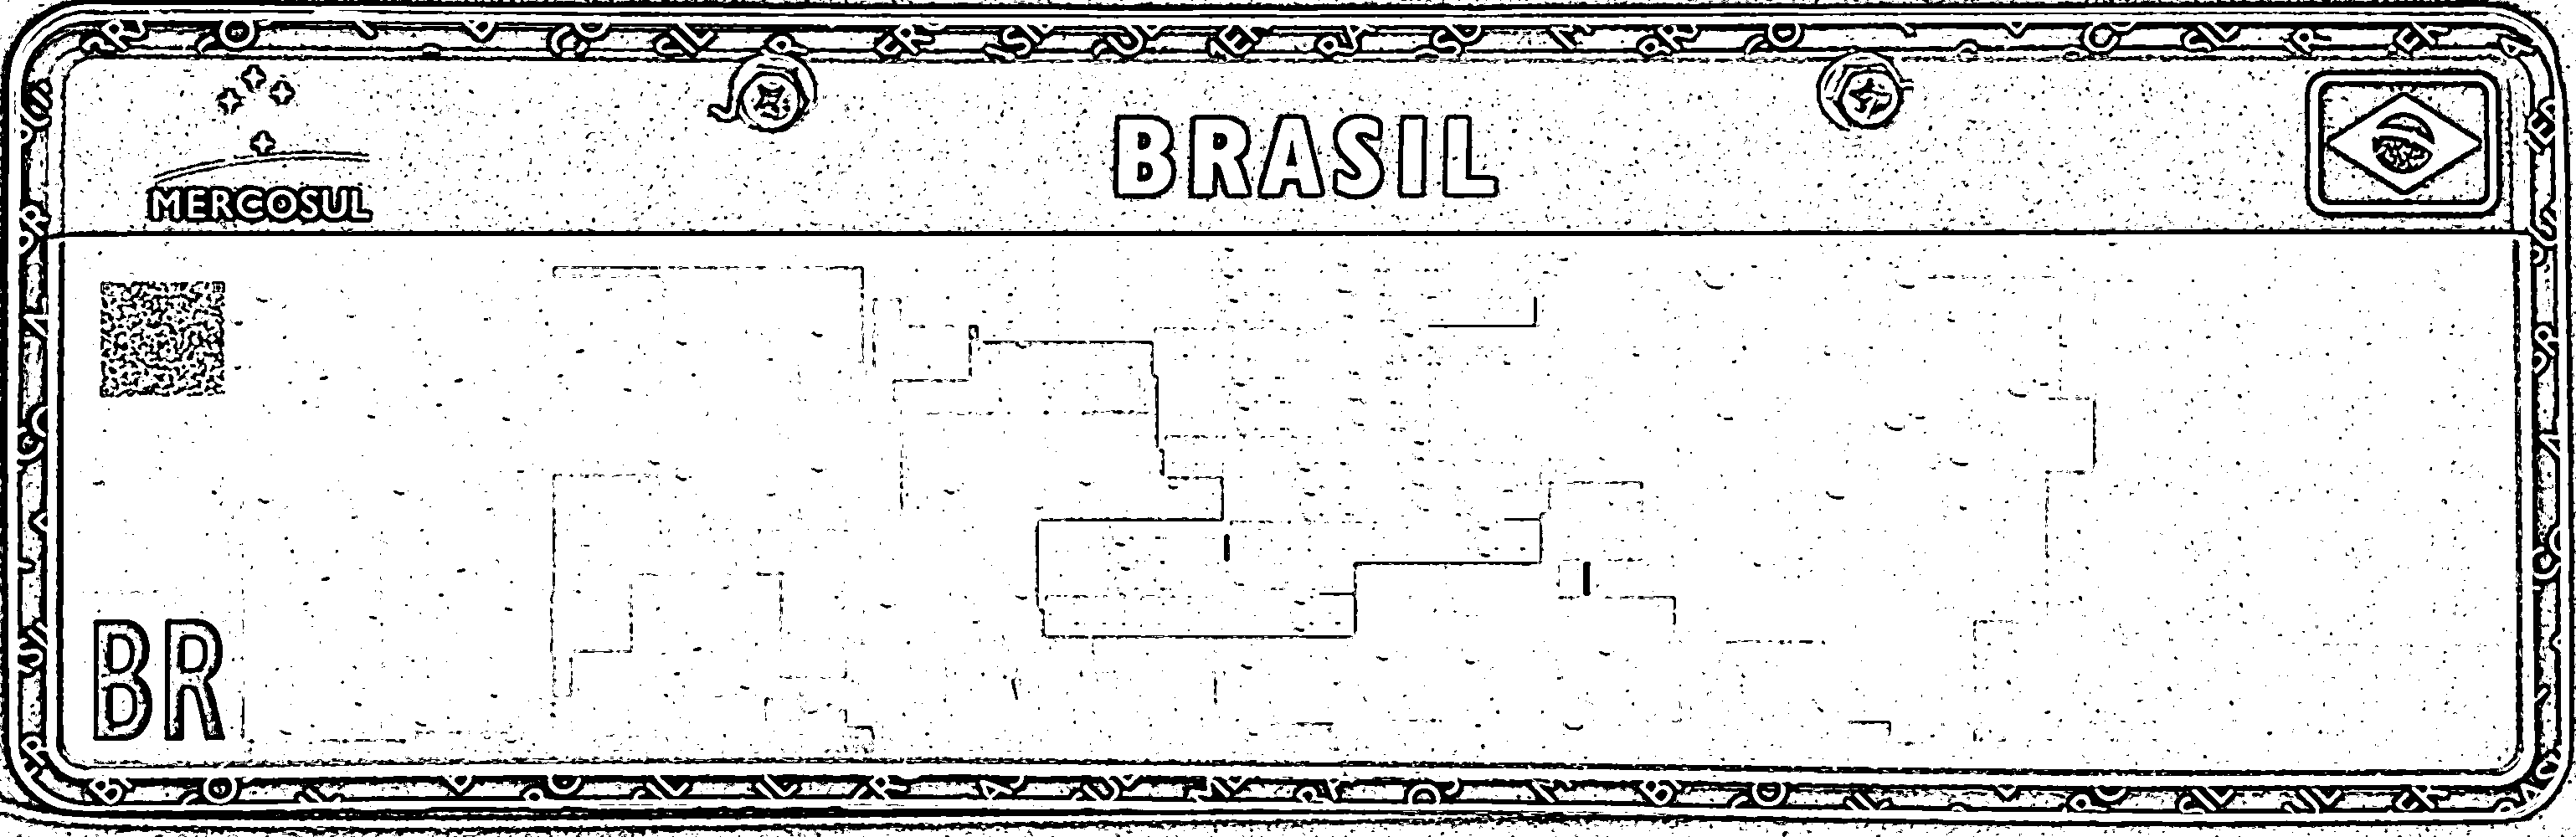

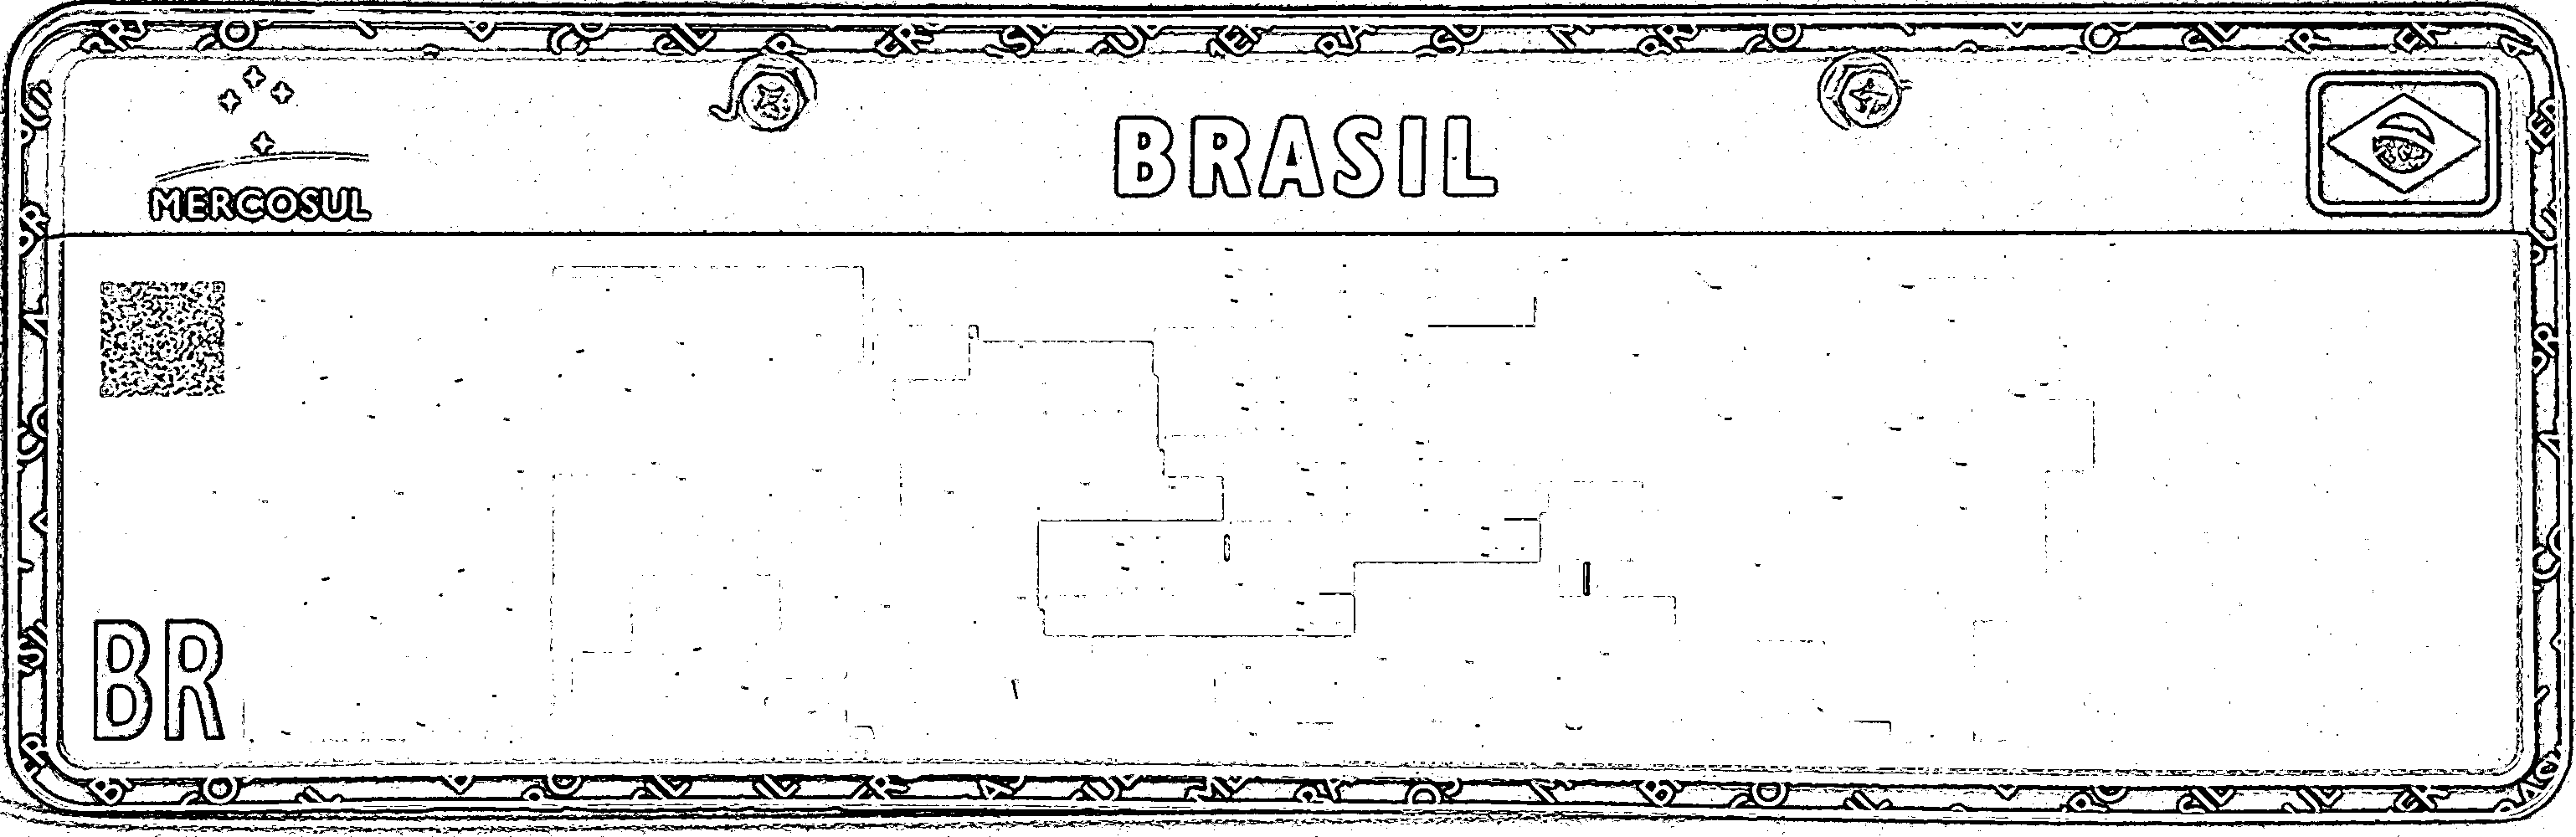

In [78]:
img = cv.imread('vehicle_blank.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)

cv2_imshow(th1)
cv2_imshow(th2)
cv2_imshow(th3)

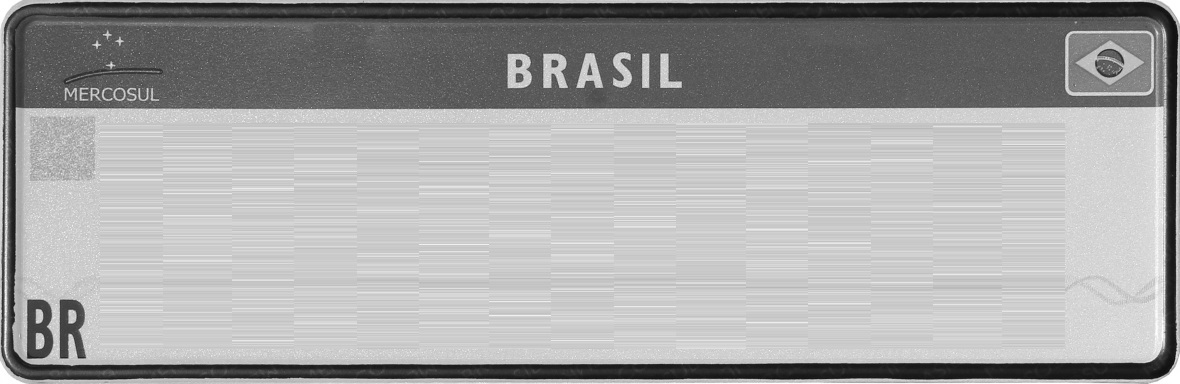

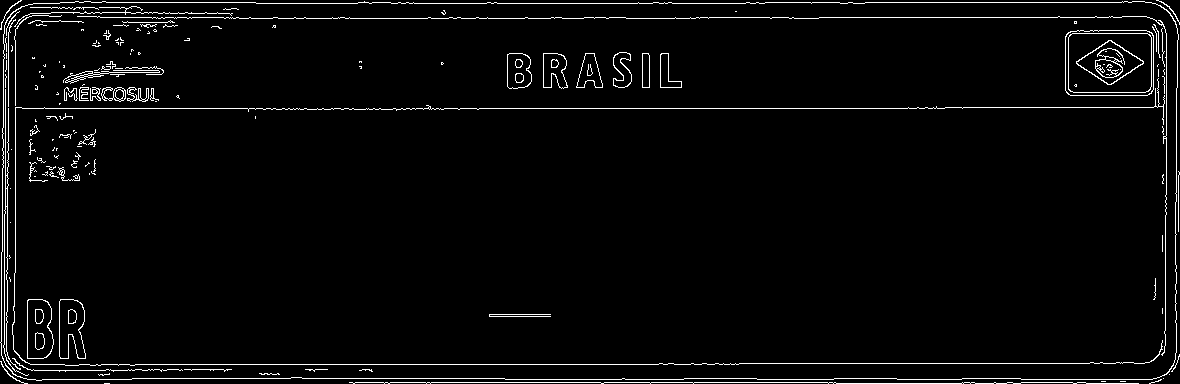

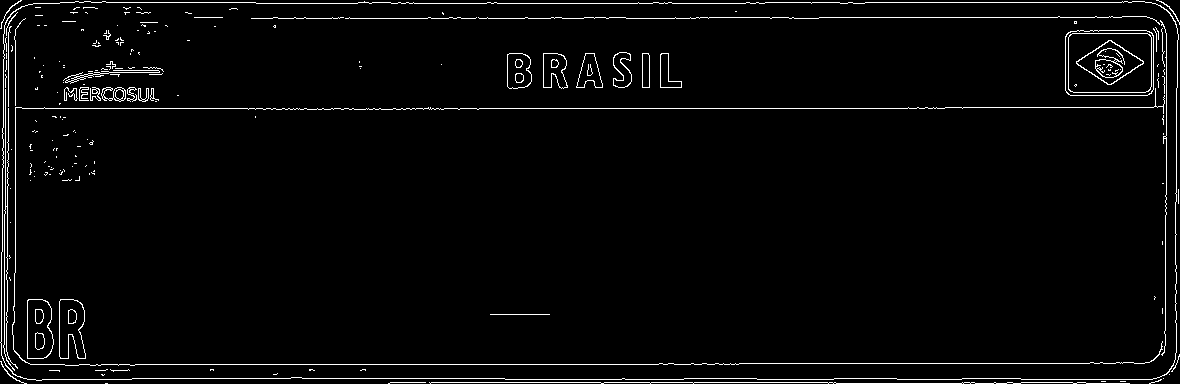

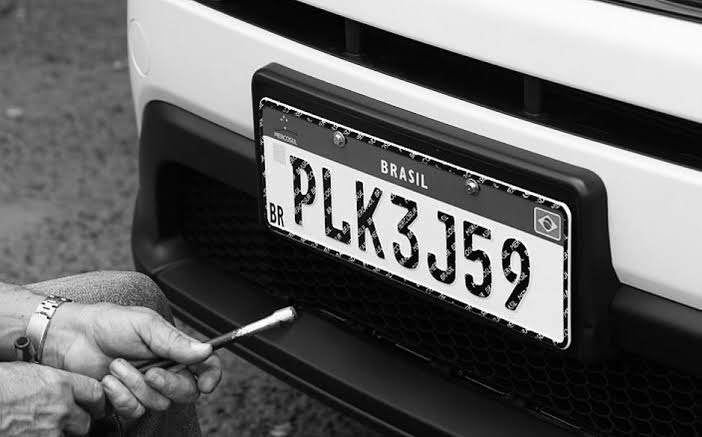

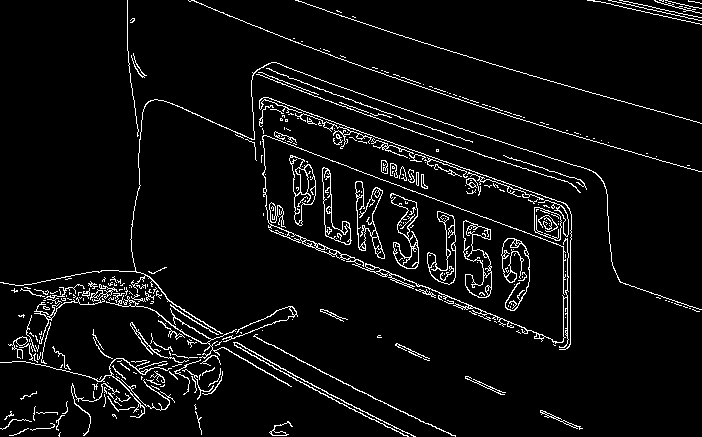

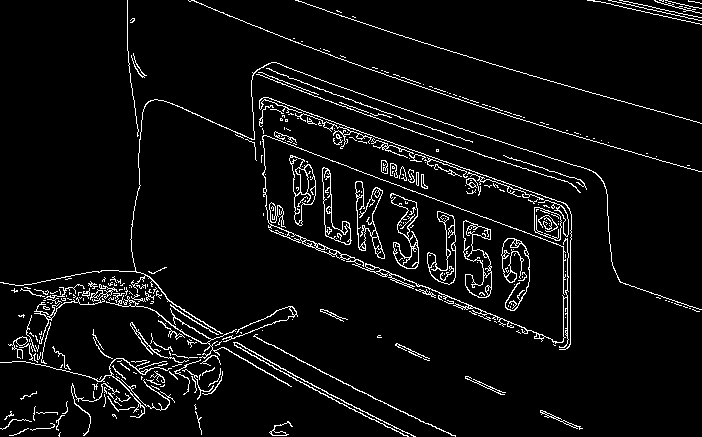

In [59]:
img1 = cv.cvtColor(cv.imread('placa_carro_blank.jpg'), cv.COLOR_BGR2GRAY)
edges1 = cv.Canny(img1,100,200)
cv2_imshow(img1)
cv2_imshow(edges1)

edges1 = cv.Canny(img1,150,200)
cv2_imshow(edges1)

img2 = cv.cvtColor(cv.imread('placa_de_carroII.jpg'), cv.COLOR_BGR2GRAY)
edges2 = cv.Canny(img2,100,200)
cv2_imshow(img2)
cv2_imshow(edges2)

edges = cv.Canny(img2,150,200)
cv2_imshow(edges2)

(440, 32)
(500, 32)


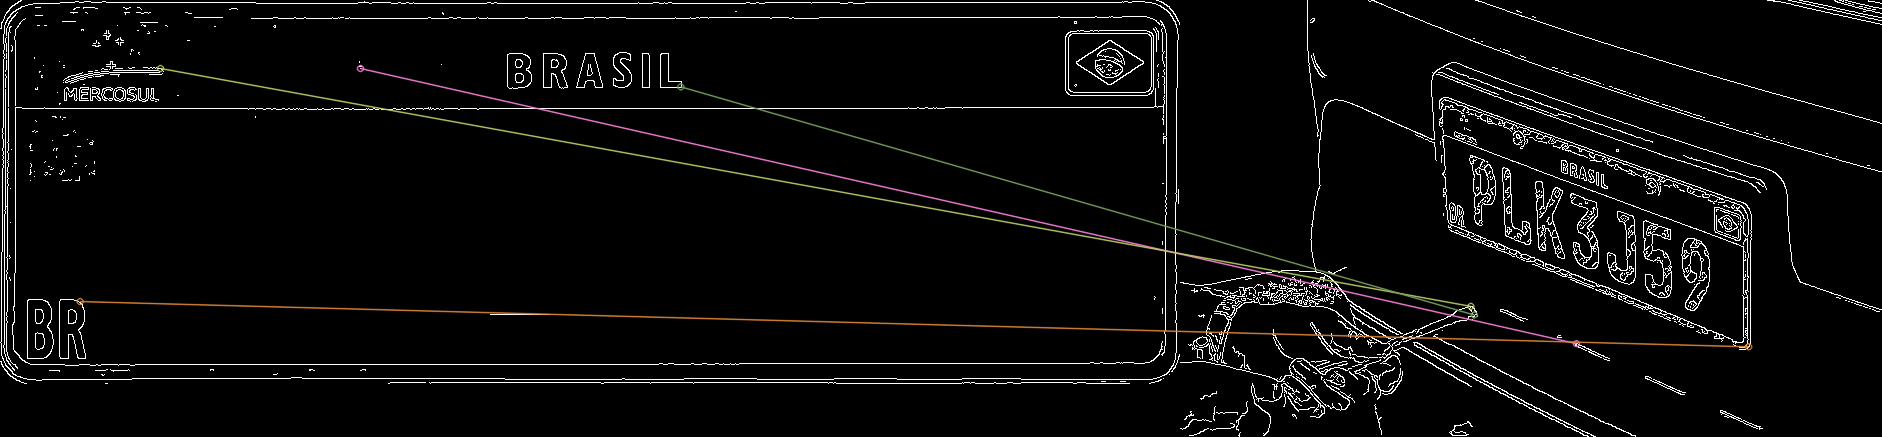

In [60]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(edges1,None)
kp2, des2 = orb.detectAndCompute(edges2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

print(des1.shape)
print(des2.shape)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(edges1,kp1,edges2,kp2,matches[:4],None, flags=2)

cv2_imshow(img3)

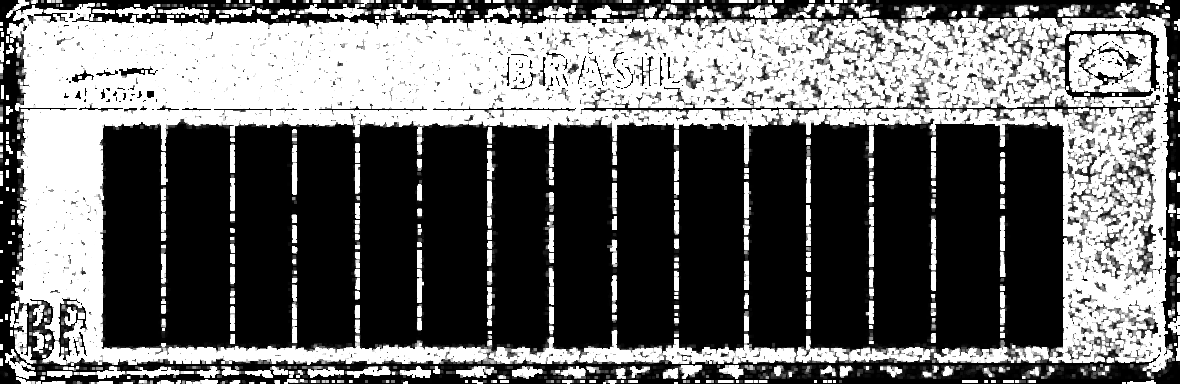

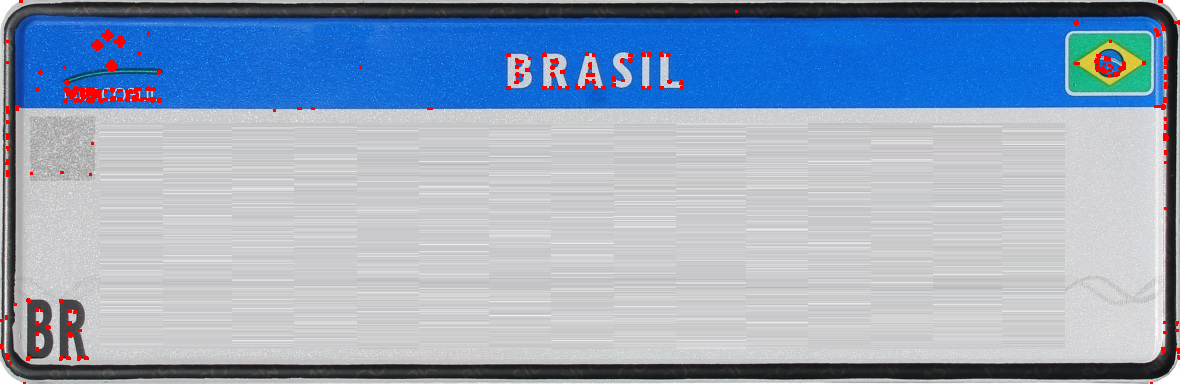

In [25]:
filename = 'placa_carro_blank.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
cv2_imshow(dst)
print("")
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)

(500, 32)
(500, 32)


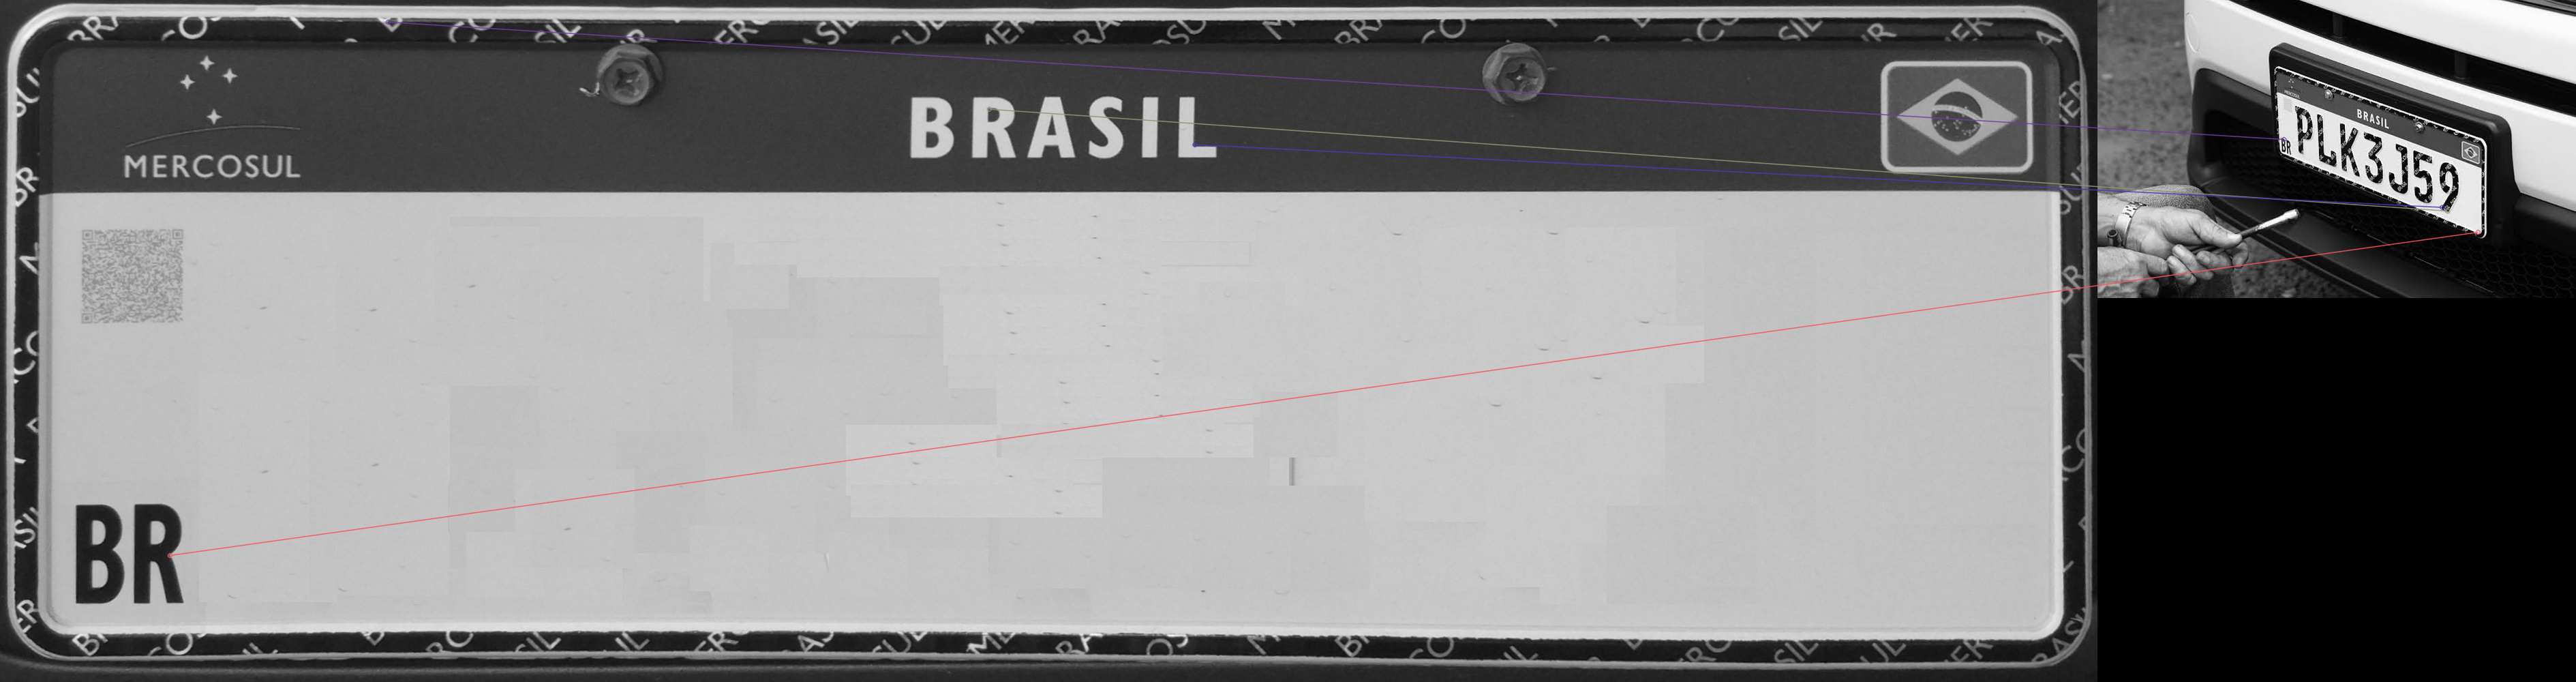

In [28]:


orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

print(des1.shape)
print(des2.shape)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:4],None, flags=2)

cv2_imshow(img3)

(388, 32)
(493, 32)


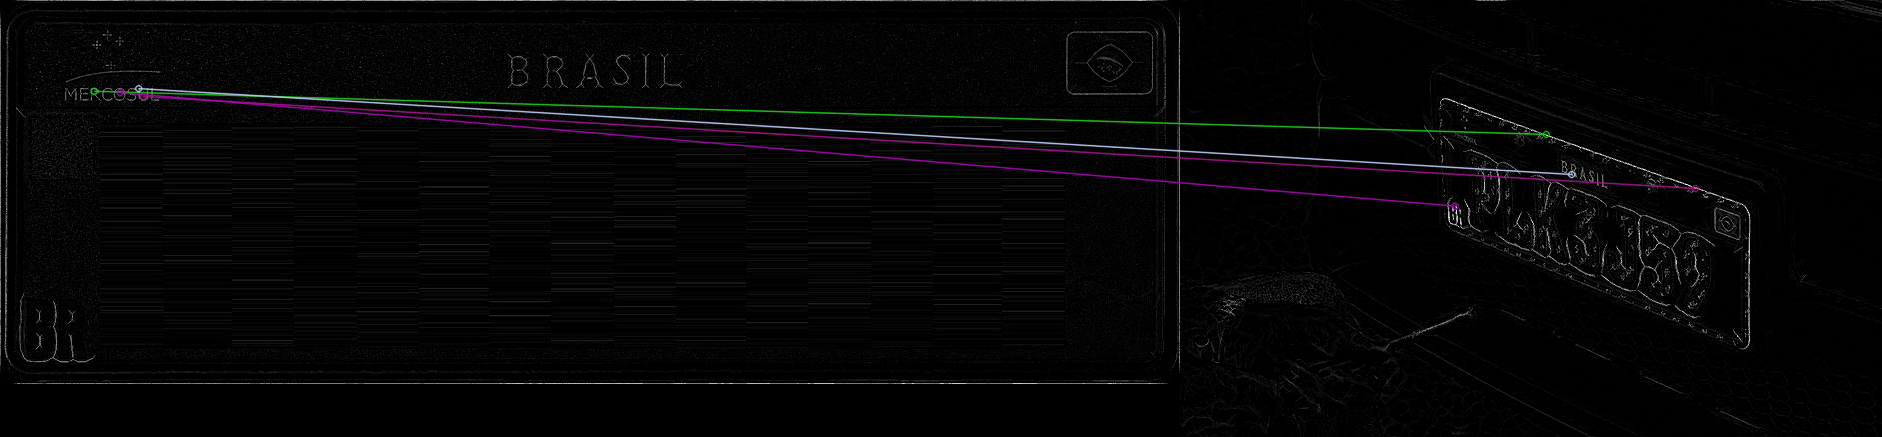

In [23]:
def enigma(img):
    img = img.copy() 
    skel = img.copy()

    skel[:,:] = 0
    kernel = cv.getStructuringElement(cv.MORPH_CROSS, (3,3))

    for i in range(10):
        eroded = cv.morphologyEx(img, cv.MORPH_ERODE, kernel)
        temp = cv.morphologyEx(eroded, cv.MORPH_DILATE, kernel)
        temp  = cv.subtract(img, temp)
        skel = cv.bitwise_or(skel, temp)
        img[:,:] = eroded[:,:]
    return skel
imm1 = enigma(img1)
imm2 = enigma(img2)
#cv2_imshow()

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(imm1,None)
kp2, des2 = orb.detectAndCompute(imm2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)

print(des1.shape)
print(des2.shape)

matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
imm3 = cv.drawMatches(imm1,kp1,imm2,kp2,matches[:4],None, flags=2)

cv2_imshow(imm3)

In [30]:
# pontos 3D (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:6].T.reshape(-1,2)

objpoints = [] # pontos 3D dos objetos
imgpoints = [] # pontos 3D das imagens

images = ['vehicle_blank.jpg','placa_de_carroII.jpg']

cornerss = np.zeros((2, 4, 1, 2))
i=0
for fname in images:
    img = cv.imread(fname)
    gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

    # Encontra 42 (7x6) corners no tabuleiro de xadrez
    ret, corners = cv.findChessboardCorners(gray, (7,6),None)
    cv2_imshow(img)
    #print(np.size(corners))
    #print(corners.shape)
    print(corners)
    corners = np.array([corners[0],corners[6],corners[-7],corners[-1]])
    cornerss[i] = corners
    #print(cornerss[i].shape)

    
    i+=1

    # Caso encontrados, adiciona pontos 3D e 2D nas listas objpoints e imgpoints
    # com refinamento da busca
    if ret == True:
        objpoints.append(objp)
        # critério de término de busca
        criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Desenha e mostra os corners nas diversas imagens
        img = cv.drawChessboardCorners(img, (7,6), corners2,ret)
        cv2_imshow(img)

print(cornerss.shape)
H, status = cv.findHomography(cornerss[0], cornerss[1])

esquerda = cv.imread('esquerda.png')

out = cv.warpPerspective(esquerda, H, (895,668))

cv2_imshow(out)

None


TypeError: ignored

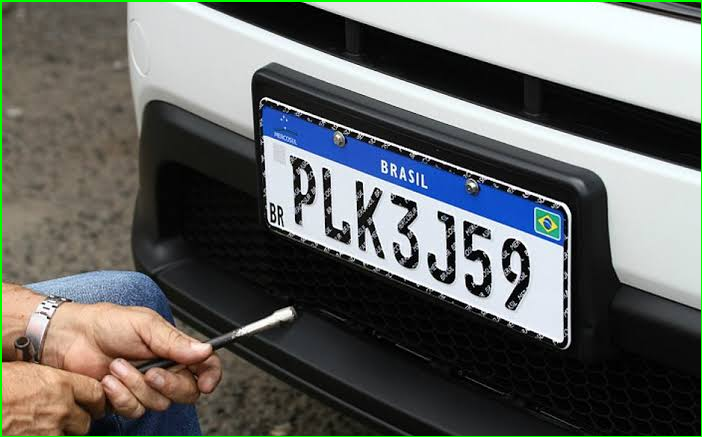

In [37]:
img = cv.imread("placa_de_carroII.jpg", -1)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

binary = cv.bitwise_not(gray)

contours,hierarchy = cv.findContours(binary, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for contour in contours:
    (x,y,w,h) = cv.boundingRect(contour)
    cv.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

cv2_imshow(img)

As subimagens A,B,C,D,E e F são chamados de **features** (**detalhes**) da imagem. Nestas features, temos dois problemas importantes:


*   Como reconhecer as features ?
*   Como encontrar correspondências entre as features ?

+


**DETECÇÃO DE FEATURES**

Uma das features mais comuns de ser detectar são os **cantos** (**corners**). Corners são regiões de grande variação de intensidade em todas as direções. 

Um dos detectores de corners mais conhecido é o Detector de Corners Harry (Harry Corner Detector). Neste detector, para cada ponto (x,y) da imagem, associamos uma função que mede o deslocamento de intensidade $E(u,v)$ numa direção $(u,v)$:




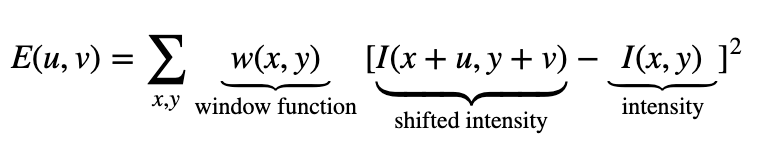

In [ ]:
imagem = cv.imread('harris.png')
cv2_imshow(imagem)

Esta função pode ser colocada na seguinte forma matricial:

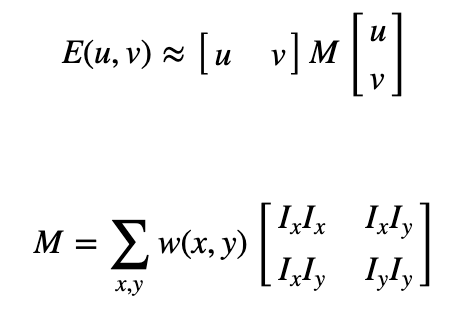

In [ ]:
imagem = cv.imread('harrismat.png')
cv2_imshow(imagem)

$I_{x}$ e $I_{y}$ são as derivadas da imagems na direções $x,y$ repectivamente. Associada à matriz $M$, definimos o valor $R=det(M)-k \times traço(M)$.

Supondo que $λ_{1}$ e $λ_{2}$ sejam os auto-valores de $M$, temos que:



*   $det(M)=λ_{1}\times λ_{2}$
*   $traço(M)=λ_{1}+λ_{2}$

Temos alguns casos teóricos para resolver inicialmente:


*   Quando R é pequeno, se λ1 e λ2 forem pequenos, a região é flat. 
*   Quando R é grande,  a região é um corner. 
*   Quando R<0, que acontece com $λ_{1}>>λ2$, a região é uma aresta (edge).

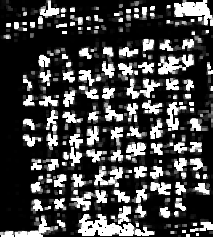

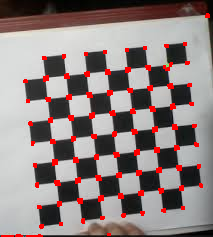

**EXERCÍCIO**

Utilizando Morfologia Matemática, melhore a qualidade dos corners detectados pelo algoritmo acima.

In [ ]:
import numpy as np
filename = 'chess.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
cv2_imshow(dst)
print("")
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)

**EXERCÍCIO**

Encontre os corners da imagem abaixo. A partir do resultado, discuta se é possível contar o número de janelas desta construção.

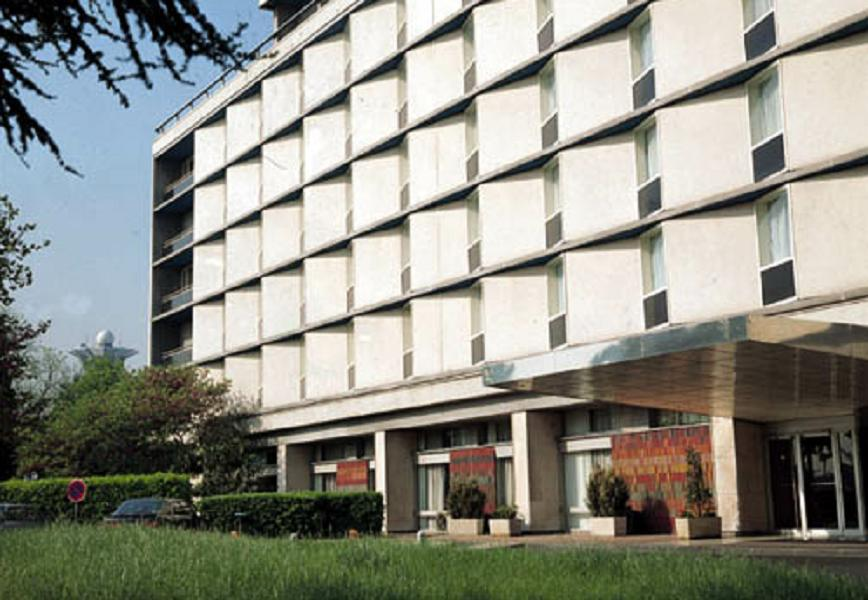

In [ ]:
imagem = cv.imread('building.jpg')
cv2_imshow(imagem)

**CORRESPONDÊNCIAS DE FEATURES**

Duas features são **correpondentes** se possuem **características semelhantes** (cor, textura, etc). A obtenção de correspondêcias entre features é conhecida como **homografia**. Por exemplo, queremos saber qual a correspondência entre o espaço de busca (imagem) e um padrão desejado (almofada).

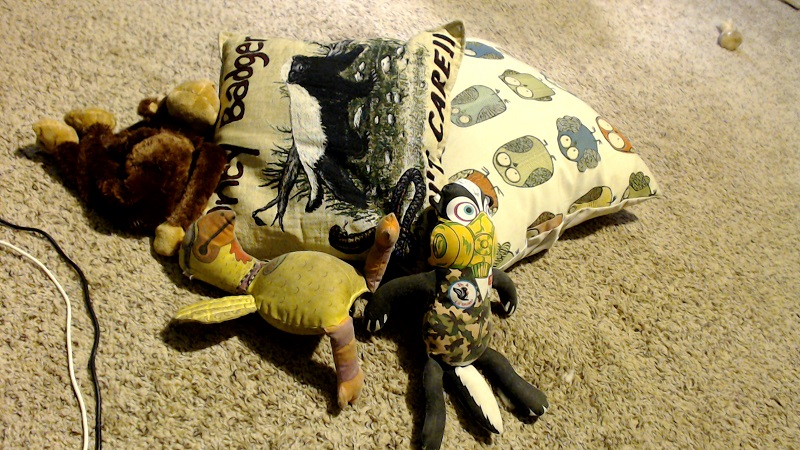

In [ ]:
imagem = cv.imread('image-homografia.jpg')
cv2_imshow(imagem)

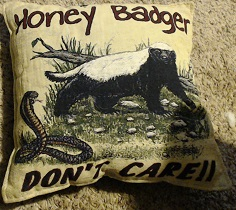

In [ ]:
imagem = cv.imread('image-template-homografia.jpg')
cv2_imshow(imagem)

(384, 1180)
(437, 702)
(419, 32)
(500, 32)


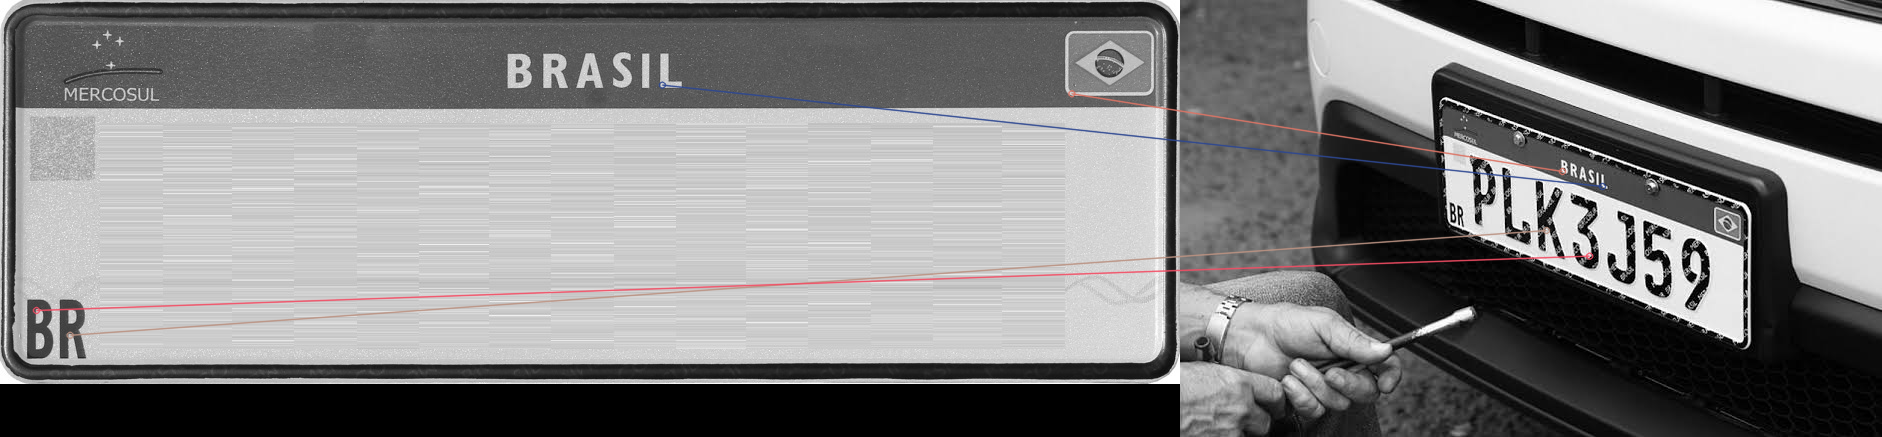

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow


**EXERCÍCIO**

Verifique se, alterando os parâmetros da chamada cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) conseguimos aumentar o número de correspondências na imagem acima.

In [ ]:
img1 = cv.imread('image-template-homografia.jpg',0)
img2 = cv.imread('image-homografia.jpg',0)
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
cv2_imshow(img3)